notebook 2
- wybór jakie zmienne mniej więcej użyć

### Importy

In [1]:
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
from scripts.train_utilities import *

In [2]:
prefix = "NFLX"

In [3]:
train_set = pd.read_csv("csv/"+prefix+"/train_set_full.csv")
test_set = pd.read_csv("csv/"+prefix+"/test_set_full.csv")
val_set = pd.read_csv("csv/"+prefix+"/val_set_full.csv")

### ZMIENNE

Newsy

In [4]:
train_set.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', 'EURUSD=X_Close',
       'mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait',
       'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', 'norm_roc_14',
       'log_return_1', 'log_return_5', 'log_return_10', 'log_return_20',
       'log_return_gspc_1', 'log_return_gspc_5', 'log_return_gspc_10',
       'log_return_gspc_20', 'target_1', 'target_5', 'target_10', 'target_20',
       'minmax_^GSPC_Volume', 'minmax_NFLX_Volume', 'minmax_daily_variation',
       'minmax_high_close_pressure', 'minmax_low_open_pressure',
       'minmax_low_norm', 'minmax_close_norm', 'minmax_high_norm',
       

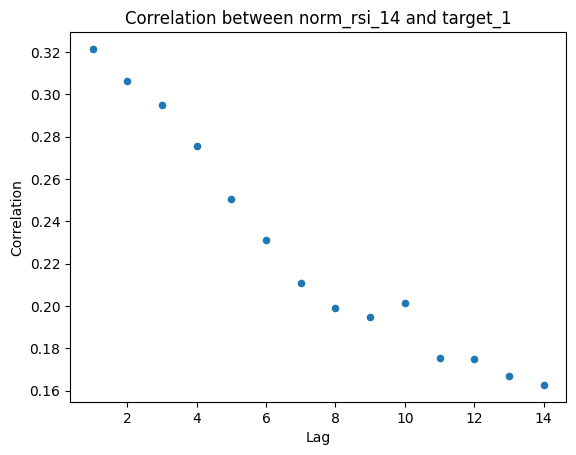

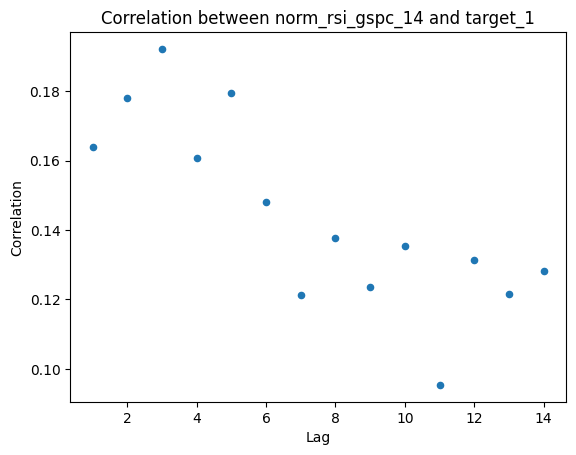

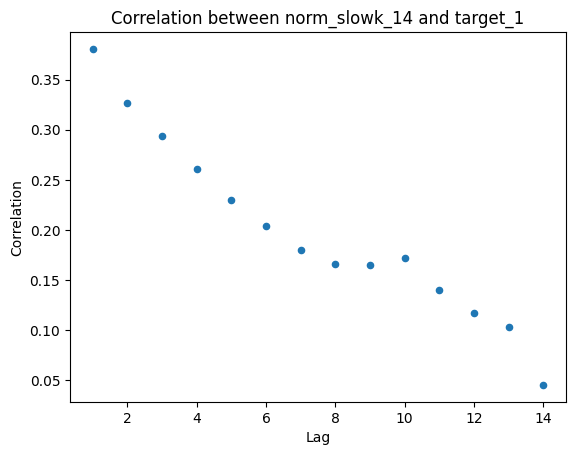

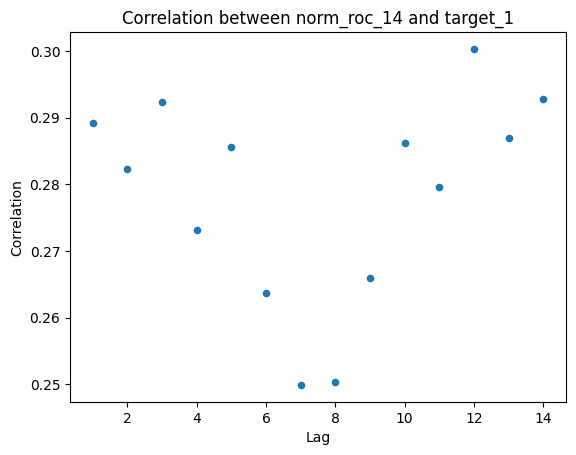

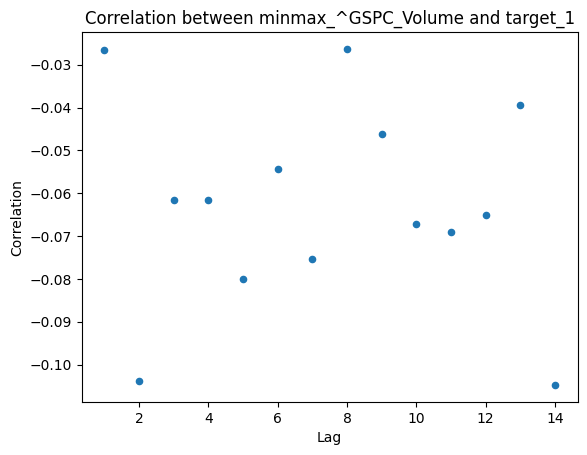

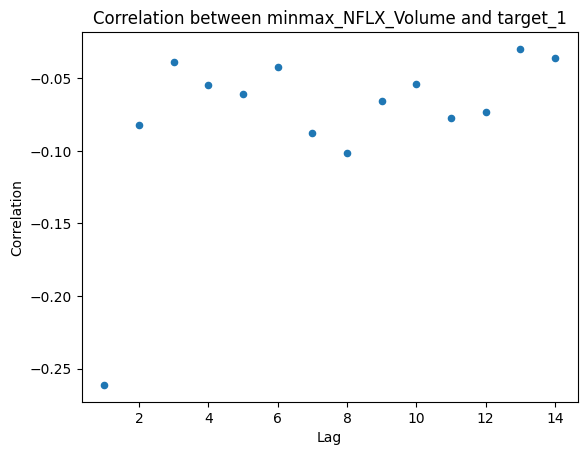

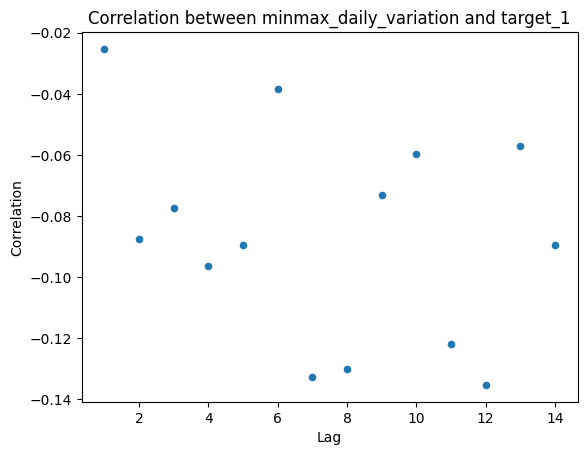

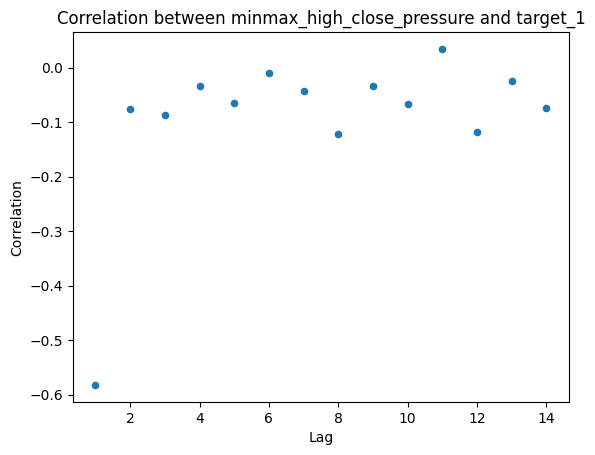

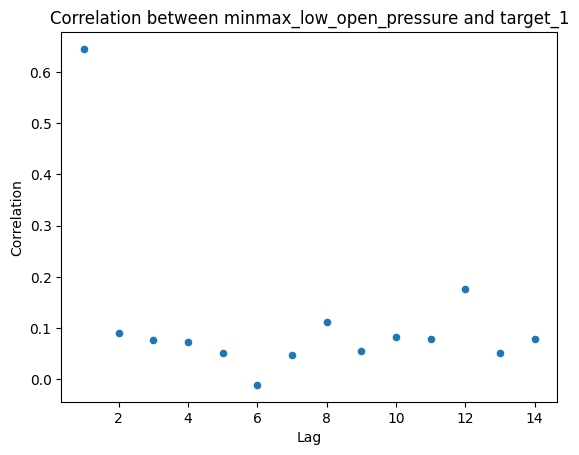

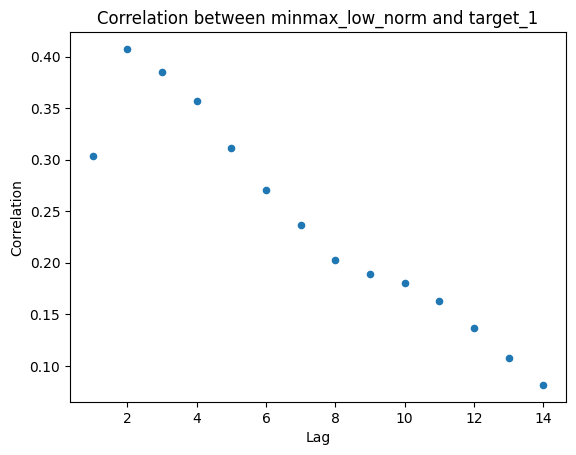

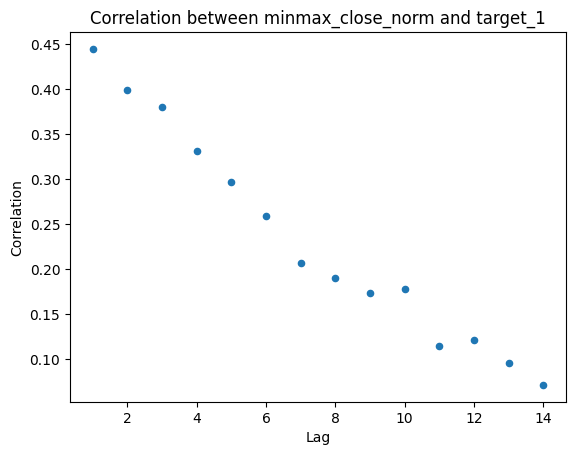

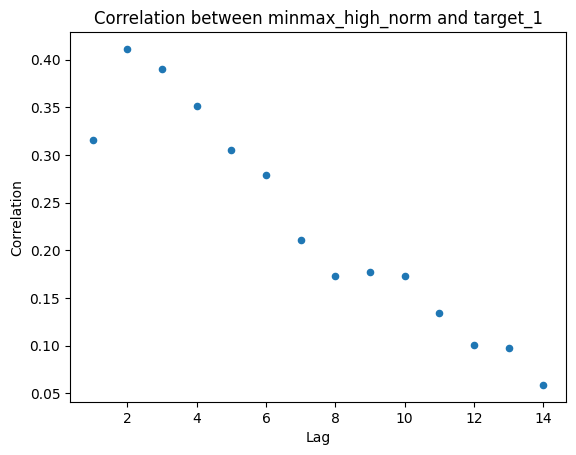

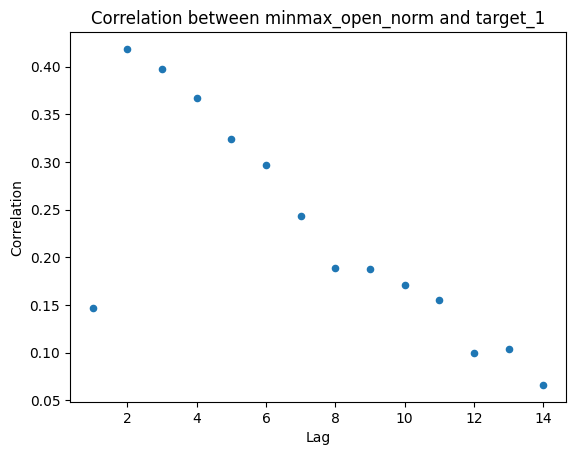

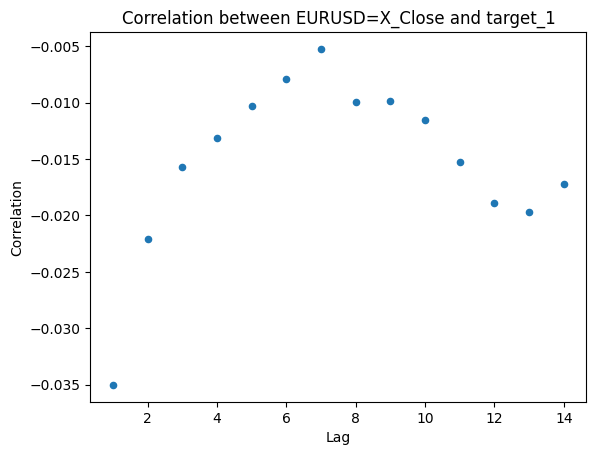

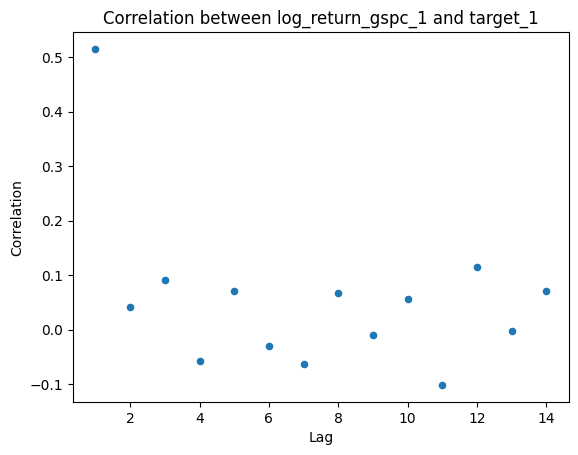

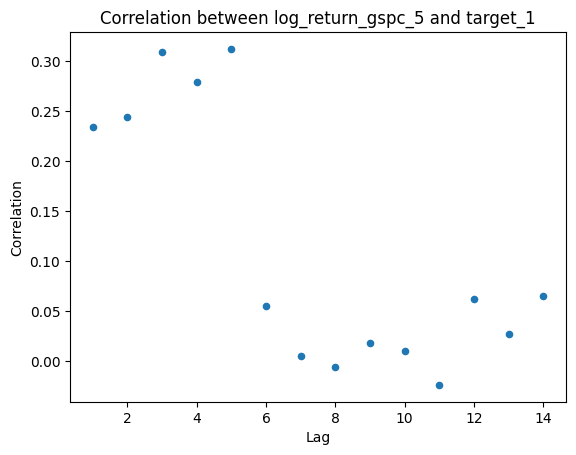

In [9]:
plot_lagged_correlations(train_set[['norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', 'norm_roc_14',
        'minmax_^GSPC_Volume', 'minmax_NFLX_Volume', 'minmax_daily_variation',
       'minmax_high_close_pressure', 'minmax_low_open_pressure',
       'minmax_low_norm', 'minmax_close_norm', 'minmax_high_norm',
       'minmax_open_norm', 'EURUSD=X_Close', 'log_return_gspc_1' ,'log_return_gspc_5','target_1']], 'target_1')

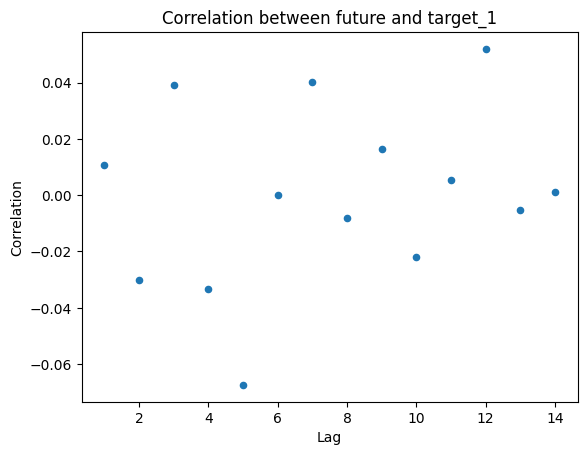

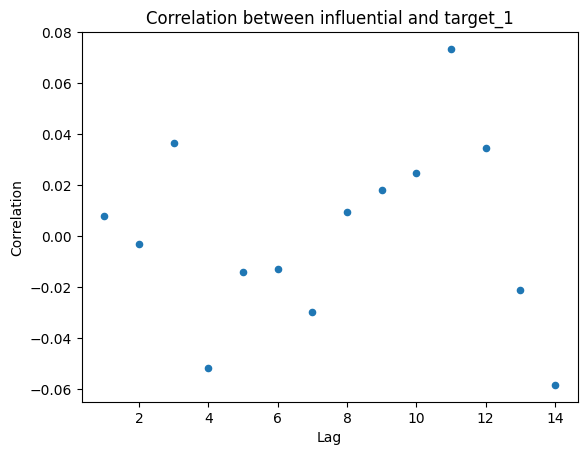

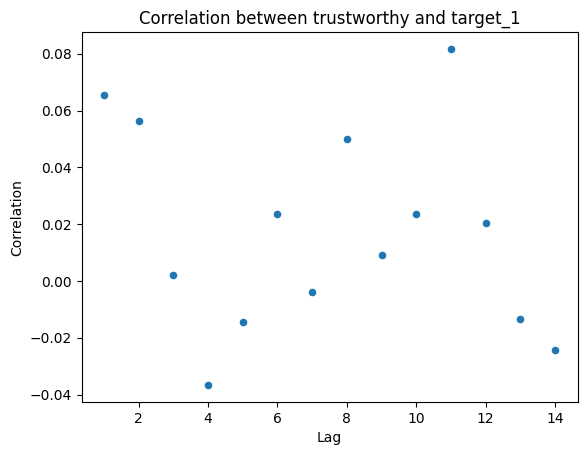

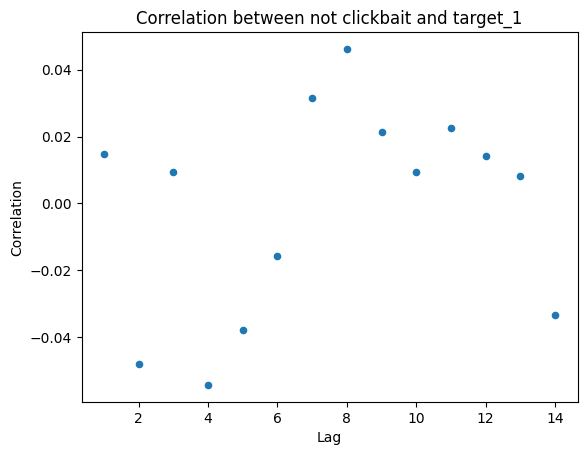

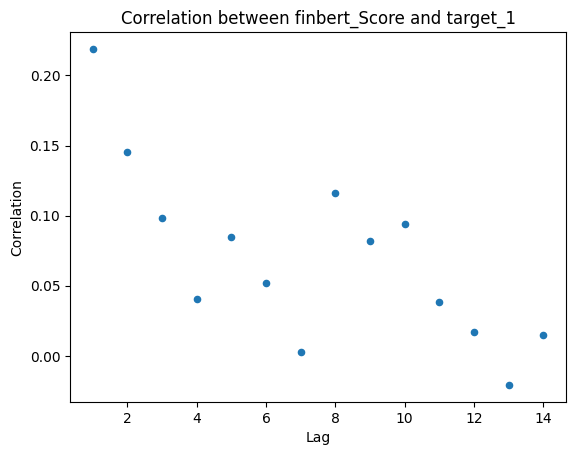

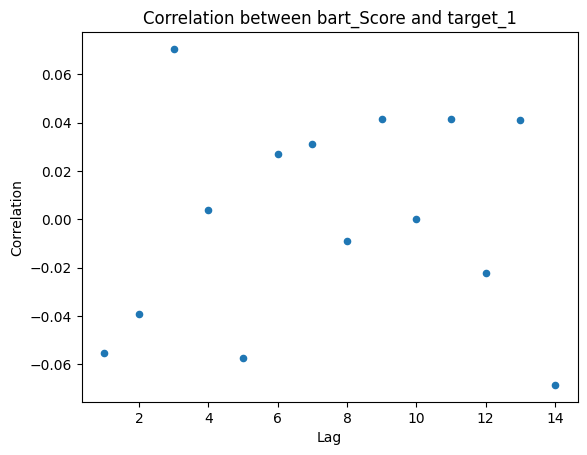

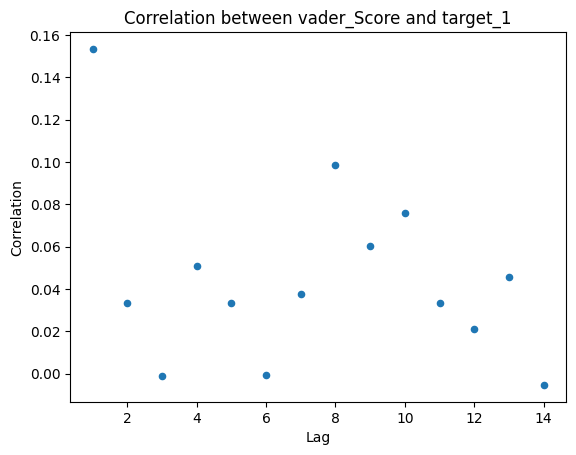

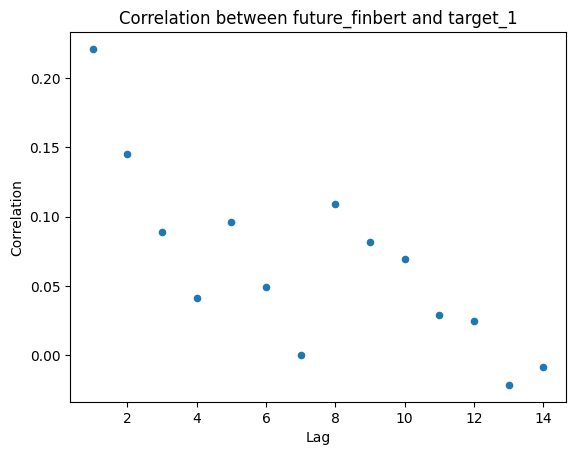

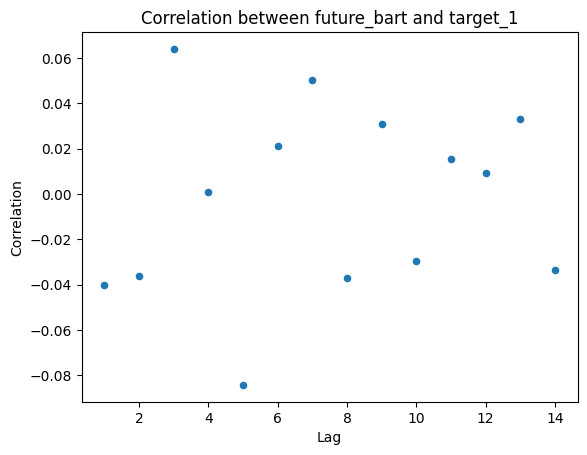

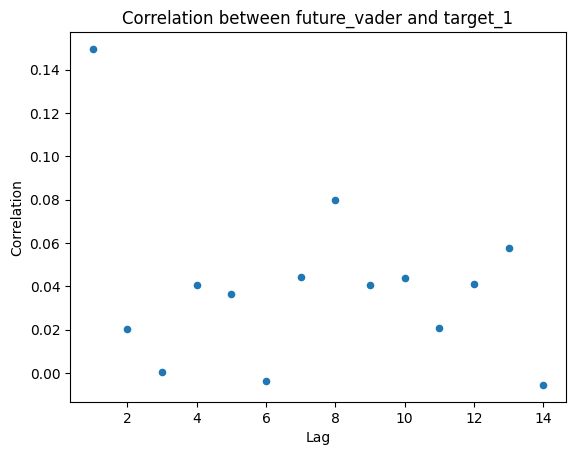

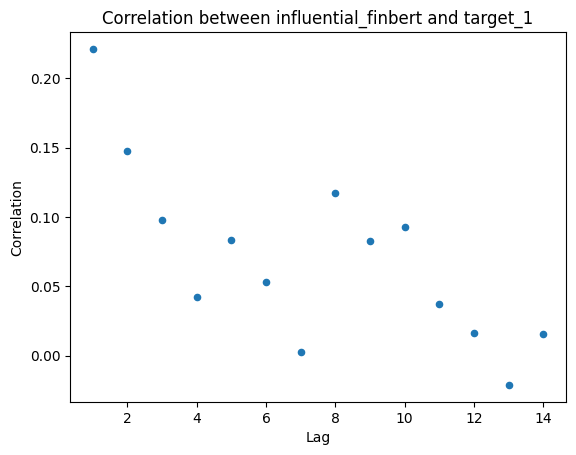

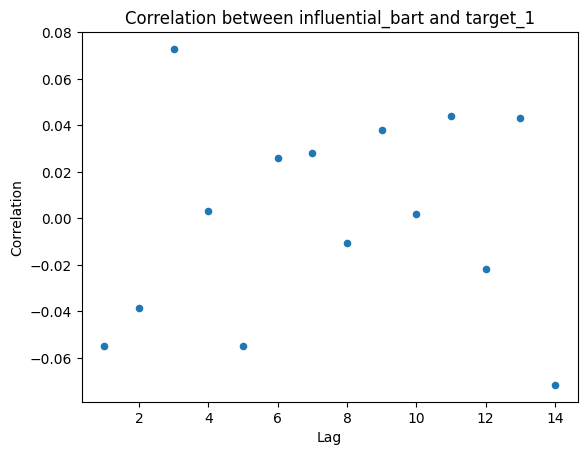

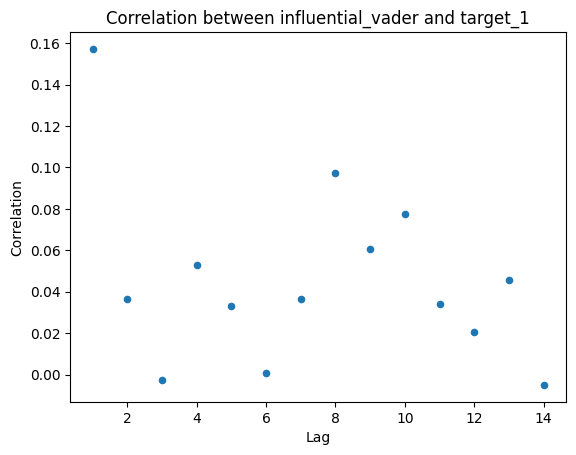

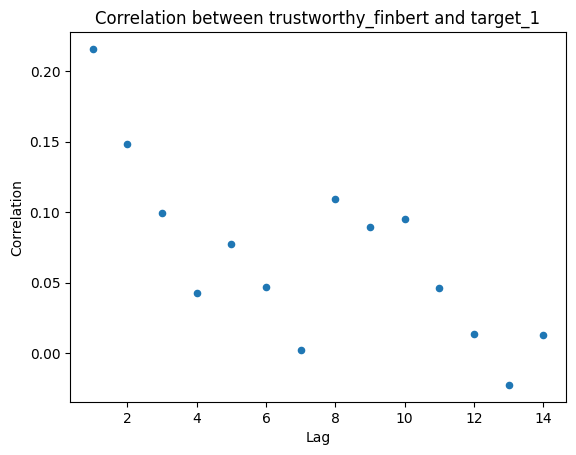

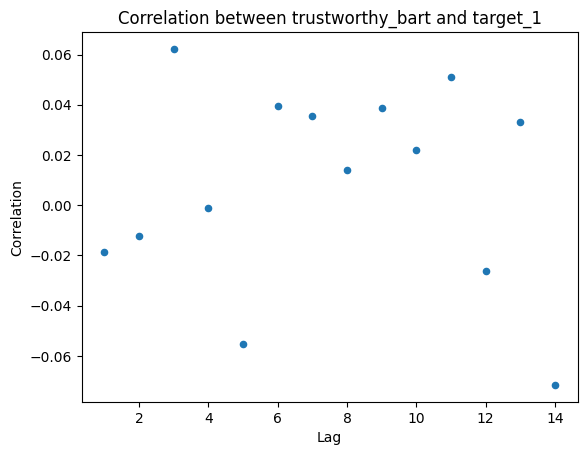

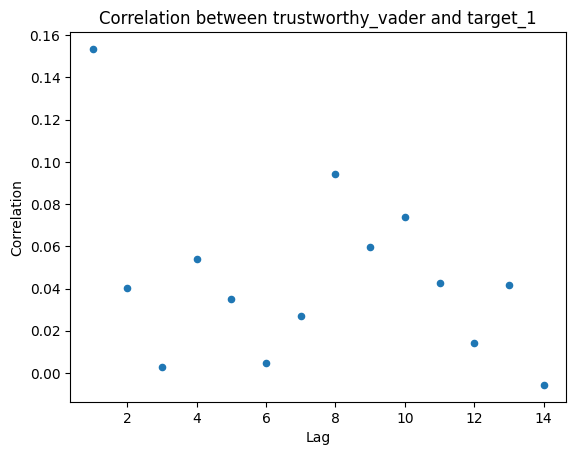

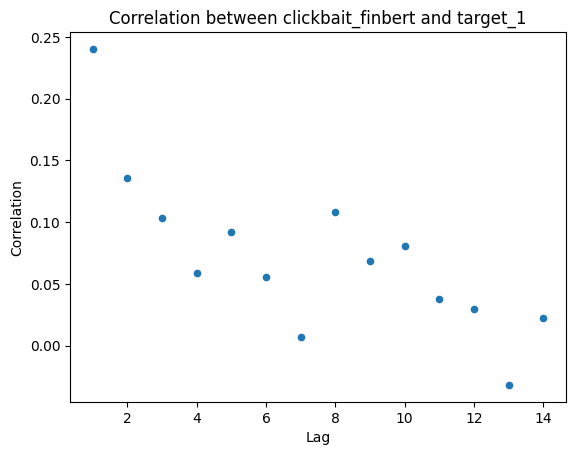

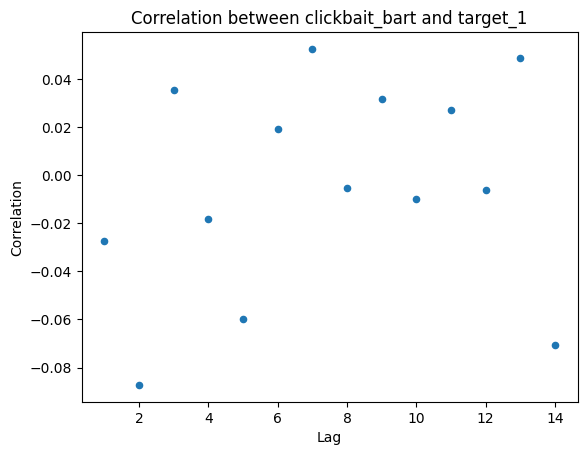

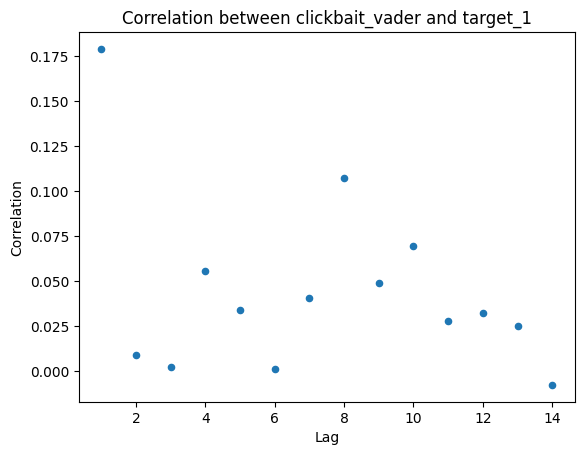

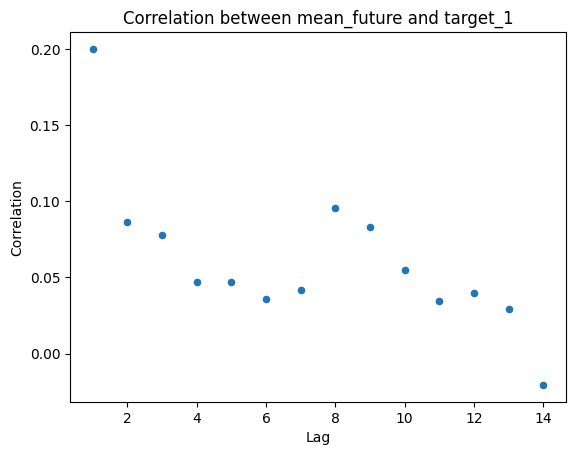

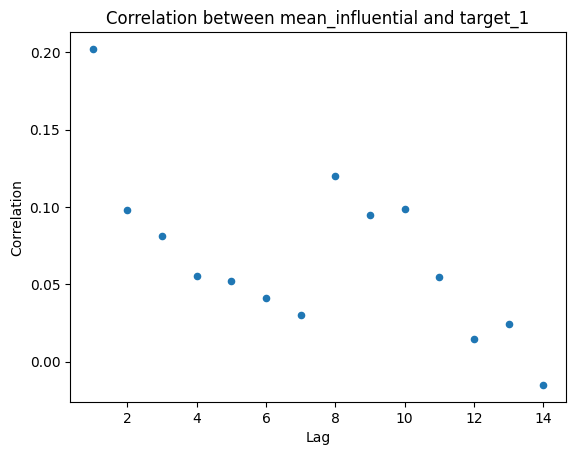

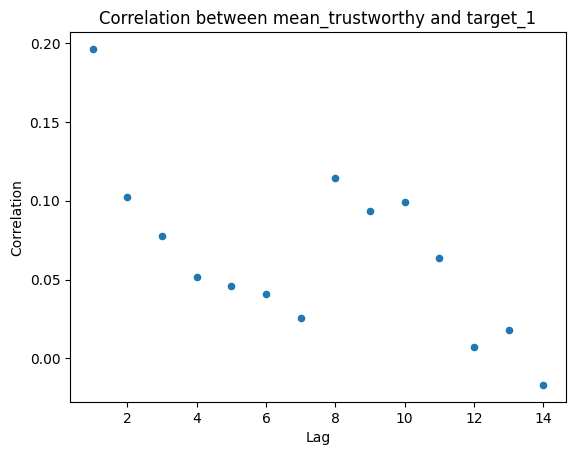

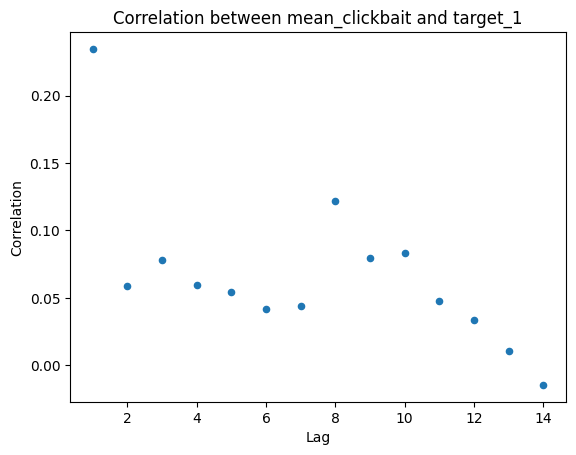

In [5]:
plot_lagged_correlations(train_set[['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader','mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait','target_1']], 'target_1')

### Proste LSTM

In [36]:
news_cols = [ 'finbert_Score', 'bart_Score', 'vader_Score',
             'mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait']

finance_cols = ['norm_rsi_14', 'norm_rsi_gspc_14',
                'norm_slowk_14', 'norm_roc_14',
                'log_return_gspc_1',
                'minmax_NFLX_Volume', 'minmax_daily_variation',
                'minmax_high_close_pressure', 'minmax_low_open_pressure']

finance_base_cols = ['minmax_NFLX_Volume', 'minmax_low_norm', 'minmax_close_norm', 'minmax_high_norm', 'minmax_open_norm']

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, InputLayer
from keras.losses import Huber

ModuleNotFoundError: No module named 'keras'

In [45]:
def window_dataset(df, target_column, window_size):
    X = []
    y = []

    # Iterate over the dataset
    for i in range(len(df) - window_size):
        # Extract the window of data
        window = df[i:i+window_size]

        # Extract the features (X) and target (y)
        X.append(window.drop(columns=[target_column]).values)
        y.append(df[target_column][i+window_size])

    return np.array(X), np.array(y)

X,y = window_dataset(train_set[finance_base_cols+['target_1']], 'target_1', 5)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      ))

#model.add(Dropout(0.3))
model.add(LSTM(units=25,return_sequences=True))
#model.add(Dropout(0.3))
model.add(LSTM(units=25,return_sequences=False))
model.add(Dense(10, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
tf.keras.backend.clear_session()

# Set the learning rate
learning_rate = 8e-4
#10e-7
# Set the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])

history = model.fit(X_train, y_train, epochs=300)

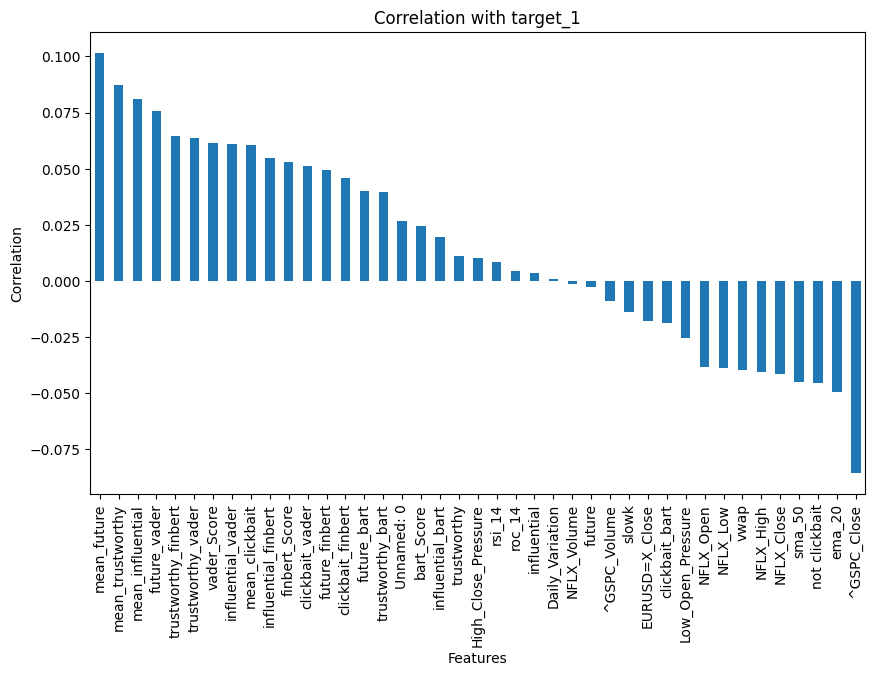

In [38]:
check_and_plot_correlation(train_set.drop(columns=['Date','target_5','target_10','target_20']), 'target_1',method_='spearman')

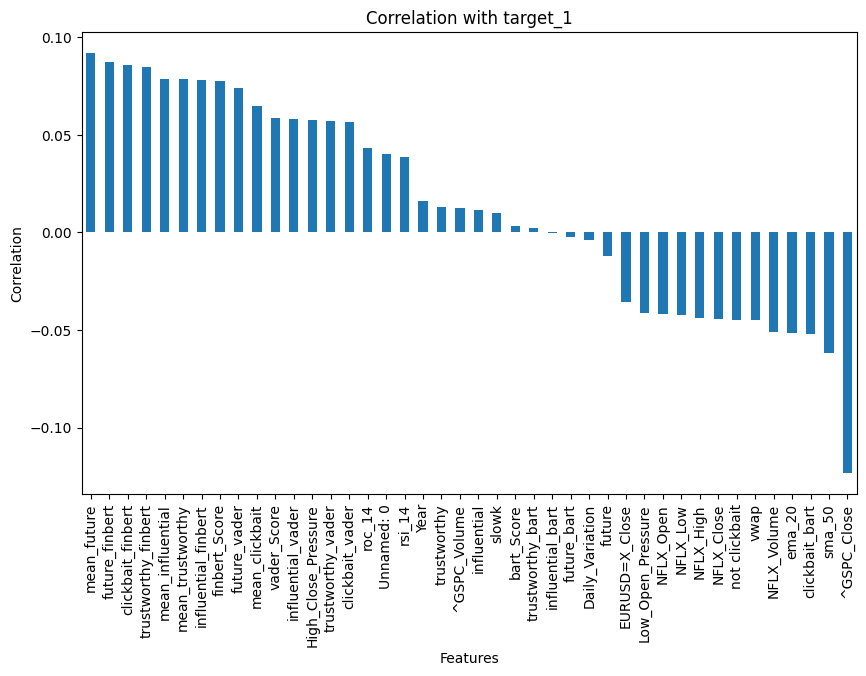

In [25]:
check_and_plot_correlation(train_set.drop(columns=['Date','target_5','target_10','target_20']), 'target_1',method_='pearson')